<a href="https://colab.research.google.com/github/NikhilaArutla/Nikhila_INFO5731_Spring2025/blob/main/Arutla_Nikhila_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [37]:
import csv
import re
from collections import defaultdict

# Loading the dataset
def read_data(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)
        abstracts = [row[1].lower() for row in reader if len(row) > 1]
    return abstracts

# Tokenizing text into words
def tokenize(text):
    return re.findall(r'\b\w+\b', text)

# Generating N-grams and count frequency (N=3 for trigrams)
def ngrams(abstracts, n):
    ngram_counts = defaultdict(int)
    for abstract in abstracts:
        tokens = tokenize(abstract)
        for i in range(len(tokens) - n + 1):
            ngram = tuple(tokens[i:i + n])
            ngram_counts[ngram] += 1
    return ngram_counts

# Calculating bigram probabilities
def bigram_probabilities(abstracts):
    bigram_counts = defaultdict(int)
    unigram_counts = defaultdict(int)

    # Counting bigrams and unigrams
    for abstract in abstracts:
        tokens = tokenize(abstract)
        if not tokens:
            continue
        for i in range(len(tokens) - 1):
            bigram = (tokens[i], tokens[i+1])
            bigram_counts[bigram] += 1
            unigram_counts[tokens[i]] += 1
        unigram_counts[tokens[-1]] += 1

    # Calculating probabilities
    bigram_probabilities = {}
    for (w1, w2), count in bigram_counts.items():
        bigram_probabilities[(w1, w2)] = count / unigram_counts[w1]

    return bigram_probabilities

# Extracting noun phrases using more refined rules
def extract_noun_phrases(text):
    words = tokenize(text)
    noun_phrases = []
    current_phrase = []

    for word in words:
        if re.match(r'\b\w+ing\b|\b\w+ion\b|\b\w+ment\b|\w+s\b', word):
            current_phrase.append(word)
        else:
            if current_phrase:
                noun_phrases.append(" ".join(current_phrase))
                current_phrase = []
    if current_phrase:
        noun_phrases.append(" ".join(current_phrase))
    return noun_phrases

# Calculating relative probabilities of noun phrases for each review
def cal_relative_probabilities(abstracts):
    noun_phrase_counts = defaultdict(int)
    abstract_phrases = []

    # Extracting noun phrases from all abstracts
    for abstract in abstracts:
        phrases = extract_noun_phrases(abstract)
        abstract_phrases.append(phrases)
        for phrase in phrases:
            noun_phrase_counts[phrase] += 1

    # Calculating max frequency for scaling
    max_frequency = max(noun_phrase_counts.values())

    # Calculating relative probabilities for each review
    relative_probabilities = []
    for phrases in abstract_phrases:
        row_probabilities = {}
        for phrase in noun_phrase_counts.keys():
            frequency = phrases.count(phrase)
            row_probabilities[phrase] = frequency / max_frequency if max_frequency > 0 else 0
        relative_probabilities.append(row_probabilities)

    return relative_probabilities, list(noun_phrase_counts.keys())

# Saving the trigram frequencies to a CSV file
def save_ngrams(ngram_counts, file_path='NGRAM_FREQUENCIES_A3_Q1.csv'):
    with open(file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['N-gram', 'Frequency'])
        for ngram, count in ngram_counts.items():
            writer.writerow([' '.join(ngram), count])

# Saving the bigram probabilities to a CSV file
def save_bigram_probabilities(bigram_probs, file_path='BIGRAM_PROBABILITIES_A3_Q1.csv'):
    with open(file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Bigram', 'Probability'])
        for bigram, prob in bigram_probs.items():
            writer.writerow([' '.join(bigram), prob])

# Saving the noun phrase relative probabilities to a CSV file
def save_relative_probabilities(relative_probs, noun_phrases, file_path='RELATIVE_PROBABILITIES_A3_Q1.csv'):
    with open(file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Review'] + noun_phrases)
        for i, row in enumerate(relative_probs):
            writer.writerow([f'Review {i+1}'] + [row.get(phrase, 0) for phrase in noun_phrases])

# Function to print CSV content as table (only first 10 records)
def print_csv_table(file_path, max_rows=10):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        rows = list(reader)

        # Finding the max width for each column for pretty formatting
        column_widths = [max(len(str(item)) for item in col) for col in zip(*rows)]

        # Printing the header row
        print(" | ".join([str(item).ljust(width) for item, width in zip(rows[0], column_widths)]))
        print("-" * (sum(column_widths) + 3 * (len(rows[0]) - 1)))

        # Printing the data rows (only the first `max_rows` records)
        for row in rows[1:1+max_rows]:  # Only print up to `max_rows`
            print(" | ".join([str(item).ljust(width) for item, width in zip(row, column_widths)]))

# Main processing
file_path = 'CLEANED_IMDB_REVIEWS.csv'
abstracts = read_data(file_path)

# Task (1): Trigram frequency
trigram_counts = ngrams(abstracts, 3)
save_ngrams(trigram_counts, 'NGRAM_FREQUENCIES_A3_Q1.csv')
print("\nTRIGRAM FREQUENCIES (Top 10):\n")
print_csv_table('NGRAM_FREQUENCIES_A3_Q1.csv')

# Task (1): Bigram frequency
bigram_counts = ngrams(abstracts, 2)

# Task (2): Bigram probabilities
bigram_probs = bigram_probabilities(abstracts)
save_bigram_probabilities(bigram_probs, 'BIGRAM_PROBABILITIES_A3_Q1.csv')
print("\nBIGRAM PROBABILITIES (Top 10):\n")
print_csv_table('BIGRAM_PROBABILITIES_A3_Q1.csv')

# Task (3): Relative probabilities for noun phrases
relative_probs, noun_phrases = cal_relative_probabilities(abstracts)
save_relative_probabilities(relative_probs, noun_phrases, 'RELATIVE_PROBABILITIES_A3_Q1.csv')
print("\nRELATIVE PROBABILITIES FOR NOUN PHRASES (Top 10):\n")
print_csv_table('RELATIVE_PROBABILITIES_A3_Q1.csv')



TRIGRAM FREQUENCIES (Top 10):

N-gram                         | Frequency
------------------------------------------
too heavy handed               | 44       
beautiful film but             | 44       
film but so                    | 44       
but so preachy                 | 44       
amazing cast set               | 44       
cast set but                   | 44       
set but the                    | 44       
but the political              | 44       
the political message          | 44       
political message was          | 44       

BIGRAM PROBABILITIES (Top 10):

Bigram                 | Probability        
--------------------------------------------
too heavy              | 0.33587786259541985
heavy handed           | 1.0                
beautiful film         | 1.0                
film but               | 0.5057471264367817 
but so                 | 0.33587786259541985
so preachy             | 0.5057471264367817 
amazing cast           | 1.0                
cast set      

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [38]:
import csv
import re
import math
from collections import defaultdict, Counter

# Loading the dataset
def load_documents(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)
        documents = [row[1].lower() for row in reader if len(row) > 1]
    return documents

# Tokenizing the text into words
def tokenize(text):
    return re.findall(r'\b\w+\b', text)

# Building term frequency (TF) matrix for all documents
def compute_tf(documents):
    tf_matrix = []
    for document in documents:
        tokens = tokenize(document)
        term_counts = Counter(tokens)  # Counting frequency of each token in the document
        doc_tf = {term: count / len(tokens) for term, count in term_counts.items()}  # Normalizing by document length
        tf_matrix.append(doc_tf)
    return tf_matrix

# Computing inverse document frequency (IDF) for each term
def compute_idf(documents):
    idf_values = {}
    total_docs = len(documents)
    term_doc_count = defaultdict(int)

    # Counting how many documents contain each term
    for document in documents:
        tokens = set(tokenize(document))  # Using set to avoid counting duplicates
        for token in tokens:
            term_doc_count[token] += 1

    # Calculating IDF for each term
    for term, doc_count in term_doc_count.items():
        idf_values[term] = math.log(total_docs / (1 + doc_count))

    return idf_values

# Building the TF-IDF matrix by multiplying TF and IDF values
def build_tfidf_matrix(tf_matrix, idf_values):
    tfidf_matrix = []
    for doc_tf in tf_matrix:
        doc_tfidf = {term: tf * idf_values.get(term, 0) for term, tf in doc_tf.items()}
        tfidf_matrix.append(doc_tfidf)
    return tfidf_matrix

def cosine_similarity(doc_vector, query_vector):
    # Dot product
    dot_product = sum(doc_vector[term] * query_vector.get(term, 0) for term in doc_vector)
    # Magnitudes
    doc_magnitude = math.sqrt(sum(weight ** 2 for weight in doc_vector.values()))
    query_magnitude = math.sqrt(sum(weight ** 2 for weight in query_vector.values()))

    # Avoiding division by zero
    if doc_magnitude == 0 or query_magnitude == 0:
        return 0.0

    return dot_product / (doc_magnitude * query_magnitude)

# Building the TF-IDF vector for the query
def build_query_vector(query, idf_values):
    tokens = tokenize(query)
    term_counts = Counter(tokens)
    query_tf = {term: count / len(tokens) for term, count in term_counts.items()}
    query_tfidf = {term: query_tf[term] * idf_values.get(term, 0) for term in query_tf}
    return query_tfidf

# Ranking the documents based on cosine similarity with the query
def rank_documents(tfidf_matrix, query_vector):
    similarities = []
    for i, doc_vector in enumerate(tfidf_matrix):
        similarity = cosine_similarity(doc_vector, query_vector)
        similarities.append((i + 1, similarity))  # Storing document number (1-indexed) and similarity score

    # Sorting the documents by similarity score in descending order
    ranked_documents = sorted(similarities, key=lambda x: x[1], reverse=True)
    return ranked_documents

# Writing the ranked documents to CSV file
def write_ranked_documents_to_csv(ranked_documents, output_file):
    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Document_ID', 'Cosine_Similarity'])
        for doc_id, similarity in ranked_documents:
            writer.writerow([doc_id, similarity])

# Main execution
def main():
    # Loading the documents from CSV file
    file_path = 'CLEANED_IMDB_REVIEWS.csv'
    documents = load_documents(file_path)

    # Computing TF for all documents
    tf_matrix = compute_tf(documents)

    # Computing IDF for all documents
    idf_values = compute_idf(documents)

    # Building the TF-IDF matrix for all documents
    tfidf_matrix = build_tfidf_matrix(tf_matrix, idf_values)

    # Defining a query and building its TF-IDF vector
    query = "An Outstanding movie with a haunting performance and best character development"
    query_vector = build_query_vector(query, idf_values)

    # Ranking the documents based on cosine similarity with the query
    ranked_documents = rank_documents(tfidf_matrix, query_vector)

    # Printing ranked documents with similarity scores
    print("Ranked Documents based on Query:")
    for doc_id, similarity in ranked_documents:
        print(f"Document {doc_id}: Cosine Similarity = {similarity:.4f}")

    # Writing the ranked documents to a CSV file
    output_file = 'RANKED_DOCUMENTS_A3_Q2.csv'
    write_ranked_documents_to_csv(ranked_documents, output_file)

if __name__ == '__main__':
    main()


Ranked Documents based on Query:
Document 8: Cosine Similarity = 0.2036
Document 31: Cosine Similarity = 0.2036
Document 54: Cosine Similarity = 0.2036
Document 77: Cosine Similarity = 0.2036
Document 100: Cosine Similarity = 0.2036
Document 123: Cosine Similarity = 0.2036
Document 146: Cosine Similarity = 0.2036
Document 169: Cosine Similarity = 0.2036
Document 192: Cosine Similarity = 0.2036
Document 215: Cosine Similarity = 0.2036
Document 238: Cosine Similarity = 0.2036
Document 261: Cosine Similarity = 0.2036
Document 284: Cosine Similarity = 0.2036
Document 307: Cosine Similarity = 0.2036
Document 330: Cosine Similarity = 0.2036
Document 353: Cosine Similarity = 0.2036
Document 376: Cosine Similarity = 0.2036
Document 399: Cosine Similarity = 0.2036
Document 422: Cosine Similarity = 0.2036
Document 445: Cosine Similarity = 0.2036
Document 468: Cosine Similarity = 0.2036
Document 491: Cosine Similarity = 0.2036
Document 514: Cosine Similarity = 0.2036
Document 537: Cosine Similari

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

Word2Vec model trained and saved.


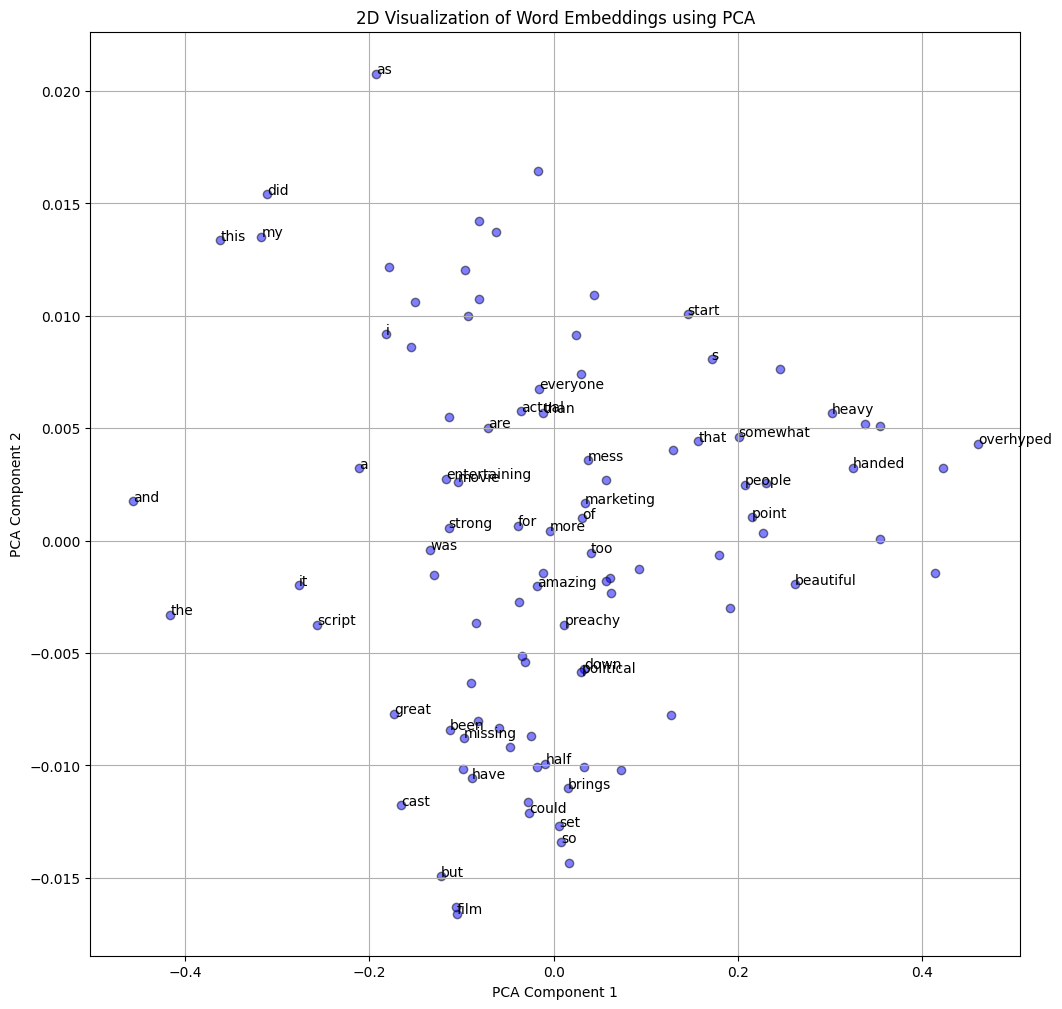

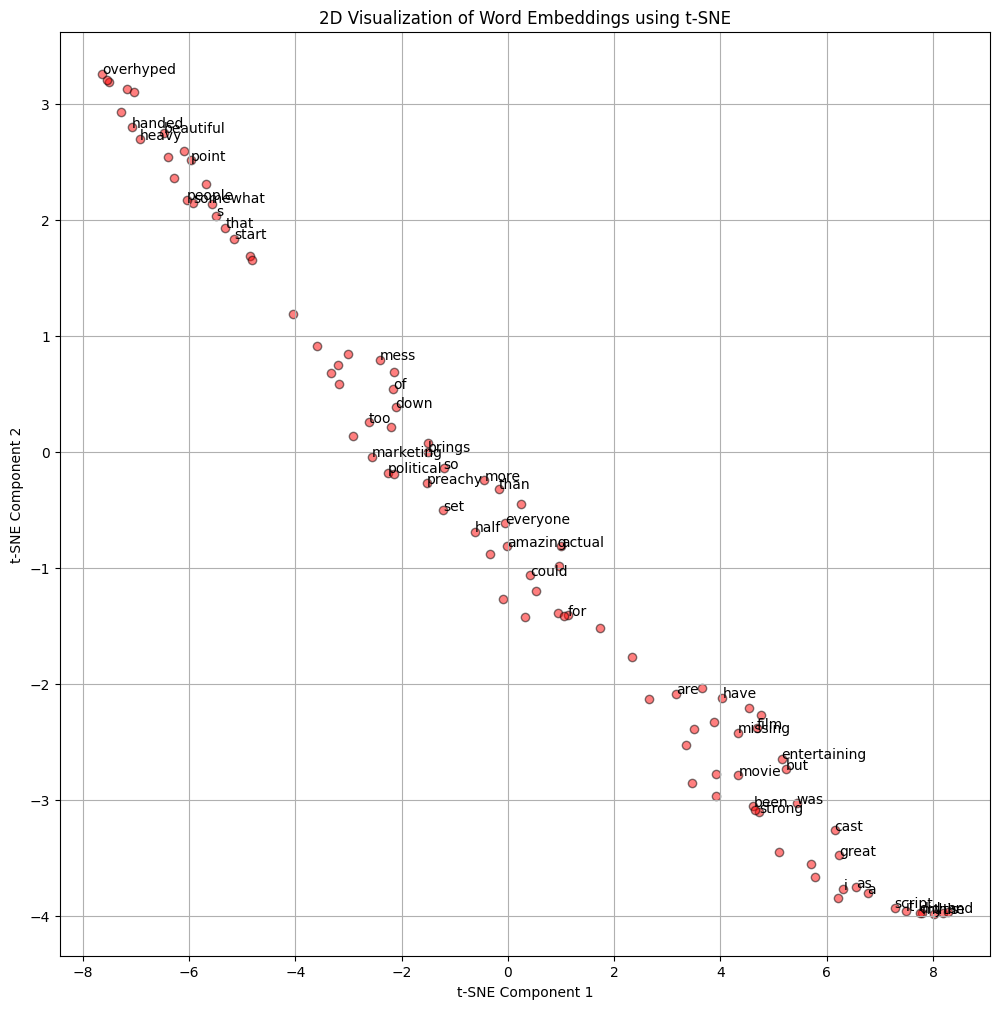

Word embeddings saved to WORD_EMBEDDINGS_A3_Q3.csv
Cosine similarity results saved to COSINE_SIMILARITY_A3_Q3.csv


In [45]:
import csv
import re
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

# Step 1: Loading the dataset
def load_data(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)
        documents = [row[1].lower() for row in reader if len(row) > 1]
    return documents

# Step 2: Tokenizing each document into words
def preprocess_documents(documents):
    tokenized_documents = []
    for document in documents:
        tokens = re.findall(r'\b\w+\b', document)
        tokenized_documents.append(tokens)
    return tokenized_documents

# Step 3: Training a Word2Vec model with 300 dimensions
def train_word2vec_model(tokenized_documents):
    embedding_dim = 300
    model = Word2Vec(sentences=tokenized_documents, vector_size=embedding_dim, window=5, min_count=2, workers=4)
    model.save("WORD2VEC_300_A3_Q3.model")
    print("Word2Vec model trained and saved.")
    return model

# Step 4: Visualizing word embeddings using PCA
def visualize_pca(model):
    words = list(model.wv.key_to_index)
    word_vectors = model.wv[words]

    # Reducing dimensions to 2D using PCA
    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(word_vectors)

    # Ploting the words
    plt.figure(figsize=(12, 12))
    plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o', color='blue', edgecolor='k', alpha=0.5)

    for i, word in enumerate(words[:50]):
        plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

    plt.title("2D Visualization of Word Embeddings using PCA")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.show()

# Step 5: Visualizing word embeddings using t-SNE
def visualize_tsne(model):
    words = list(model.wv.key_to_index)
    word_vectors = model.wv[words]

    # Reducing dimensions to 2D using t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    word_vectors_2d_tsne = tsne.fit_transform(word_vectors)

    # Ploting the words
    plt.figure(figsize=(12, 12))
    plt.scatter(word_vectors_2d_tsne[:, 0], word_vectors_2d_tsne[:, 1], marker='o', color='red', edgecolor='k', alpha=0.5)

    for i, word in enumerate(words[:50]):
        plt.annotate(word, (word_vectors_2d_tsne[i, 0], word_vectors_2d_tsne[i, 1]))

    plt.title("2D Visualization of Word Embeddings using t-SNE")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.grid(True)
    plt.show()

# Step 6: Calculating cosine similarity between word pairs
def calculate_cosine_similarity(model, word_pairs):
    results = []
    for word1, word2 in word_pairs:
        if word1 in model.wv and word2 in model.wv:
            similarity = model.wv.similarity(word1, word2)
            results.append([word1, word2, similarity])
        else:
            results.append([word1, word2, "One or both words not found"])

    # Saving the results to a CSV file
    df = pd.DataFrame(results, columns=['Word1', 'Word2', 'Cosine Similarity'])
    df.to_csv('COSINE_SIMILARITY_A3_Q3.csv', index=False)
    print(f"Cosine similarity results saved to COSINE_SIMILARITY_A3_Q3.csv")

# Step 7: Saving word embeddings to CSV
def save_embeddings_to_csv(model, output_file="WORD_EMBEDDINGS_A3_Q3.csv"):
    words = list(model.wv.key_to_index)
    word_vectors = model.wv[words]

    # Creating a DataFrame with words and their corresponding embeddings
    df = pd.DataFrame(word_vectors)
    df['word'] = words

    # Saving to CSV
    df.to_csv(output_file, index=False)
    print(f"Word embeddings saved to {output_file}")

# Main Program Execution
file_path = 'CLEANED_IMDB_REVIEWS.csv'

# Loading and preprocessing data
documents = load_data(file_path)
tokenized_documents = preprocess_documents(documents)

model = train_word2vec_model(tokenized_documents)

# Visualizing embeddings using PCA and t-SNE
visualize_pca(model)
visualize_tsne(model)

# Saving word embeddings to CSV
save_embeddings_to_csv(model)

word_pairs = [('data', 'information'), ('algorithm', 'machine'), ('model', 'learning')]
calculate_cosine_similarity(model, word_pairs)


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



# The GitHub link of your final csv file
https://github.com/NikhilaArutla/Nikhila_INFO5731_Spring2025/blob/main/ANNOTATED_SENTIMENT_DATA_A3_Q4.csv

# Link:
https://drive.google.com/file/d/1EsAT1o4l0juH2Fild377hOL_BbzvLHwO/view?usp=drive_link


The dataset for sentiment analysis that I built served as my response to this research question. I conducted research into movie reviews which I documented with positive or negative emotional trends including neutral expressions.

**NLP Task:**
The sentiment analysis operations ran on the selected dataset. In sentiment analysis the goal is to determine if textual reviews hold positive or negative statements or maintain neutrality.

**Labeling Schema:**
Each review obtained one of the three sentiment labels that I established for classification purposes.

Positive: The review holds a good or favorable perspective.

Negative: The review demonstrates an unfavorable and unappreciative stance.

Neutral: The review lacks explicit sentimental direction because it fails to demonstrate clear positive or negative views while sometimes remaining unclear or ambiguous.

**Data Example:**
Here is a small part of my dataset with the document_id, clean_text, and sentiment labels:
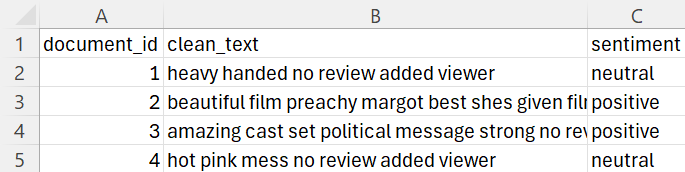


The CSV file containing document_id, clean_text and sentiment columns is ready to support sentiment analysis while enabling text classification tasks.


# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

The assignment provided me with valuable insights because it enabled me to study different elements of natural language processing (NLP) methods together with text analytical approaches. Through implementing N-grams and TF-IDF and word embedding analytical models I gained stronger knowledge of their core fundamentals.

Implementing code without library dependencies turned out to be the most difficult aspect during the development process. The assignment needed advanced understanding of its concepts while requiring precise attention which required extensive time investment.

The most enjoyable aspect of my work came from conducting sentiment analysis during review classification as positive or negative or neutral. The model capability to process actual data and produce relevant findings brought me enjoyment.

The provided assignment deadline appeared sufficient yet additional time would have allowed me to grasp each concept in detail. Certain parts in the assignment needed more time because they presented difficulties while completing them.